# Data Visualization Techniques – CA1

**Assessment Task**

You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season. Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your Jupyter Notebook report. This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant. You are required to use the dataset contained within the file “vgsales.csv” and then answer the questions.

## Table of contents
**[Exploratory Data Analysis ](#Exploratory-Data-Analysis )** \
**[Part 1](#Part-1)** \
**[Part 2](#Part-2)** \
**[Reference list](#Reference-list)**

## Data Dictionary

| Column Name | Description | Data Type |
|  :----: | :----: | :----: |
| name | Name of the Game | Text |
| platform | Game Platform  | Text |
| year_of_release | Year Game Released | Integer |
| genre | Type of Game | Text |
| publisher | Name of Game Publisher | Text |
| na_sales | North American Sales | Float |
| eu_sales | European Sales | Float |
| jp_sales | Japanese Sales | Float |
| other_sales | Sales from Other Countries Not including N-America, Europe and Japan | Float |
| global_sales | Global Sales | Float |
| critic_score | Critics Rating of the Game | Integer |
| critic_count | Number of Critics who rated the game | Integer |
| user_score | Users Rating of the Game  | Float |
| user_count | Number of Users who rated the game | Integer |
| developer | Developer Name | Text |
| rating | Appropriate User Age Rating | Text |

## Exploratory Data Analysis 

Before addressing any questions, I'll do an exploratory data analysis (EDA) to examine the dataset: I will check quality of data, find and correct any errors/biased values that might affect the analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import re
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("datasets/vgsales.csv")
print(df.shape)
df.sample(5)

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11557,Bleach: Erabareshi Tamashii,PS2,2005.0,Adventure,Sony Computer Entertainment,0.00,0.00,0.08,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN
14787,Max Payne,GBA,2003.0,Shooter,Take-Two Interactive,0.02,0.01,0.00,0.00,0.03,78.0,33.0,7.8,13.0,Mobius Entertainment,M
1839,Fight Night Champion,PS3,2011.0,Fighting,Electronic Arts,0.45,0.49,0.00,0.18,1.11,84.0,52.0,7.3,95.0,EA Canada,M
13980,Doom II: Hell on Earth,GBA,2002.0,Shooter,Activision,0.03,0.01,0.00,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
10891,Halo 2,PC,2007.0,Shooter,Microsoft Game Studios,0.01,0.06,0.00,0.02,0.09,72.0,32.0,5.6,216.0,Microsoft Game Studios,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
print('\tData types:')
print(df.dtypes,'\n\n\tNumber of nulls:')
print(df.isnull().sum())

	Data types:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object 

	Number of nulls:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [5]:
print('Check for duplicated values')
df.nunique()

Check for duplicated values


Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

Based on these outputs:
- the dataset has 16719 rows and 16 columns;
- only *Platform, NA_Sales, EU_Sales, JP_Sales, Other_Sales and Global_Sales* columns are complete (no nan values but might have zeros);
- the least variable olumn is 'Rating' (only 8 unique entries), the most variable ia 'Name';
- 6 out of 16 columns has 6000+ mising values;
- 4 columns has wrong data type (must be integers, as per information we know from [Data Dictionary](#Data-Dictionary)).


Let's change the datatype to integers in columns _'Year_of_Release', 'Critic_Score', 'Critic_Count'_ and _'User_Count'_:

In [6]:
change_to_int = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count']
for col in change_to_int:
    df[col] = df[col].fillna(0).astype('int64')
df.sample(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3538,Disney Universe,X360,2011,Action,Disney Interactive Studios,0.37,0.14,0.00,0.05,0.57,66,31,5.3,13,Eurocom Entertainment Software,E10+
10940,Imagine: Reporter,DS,2010,Simulation,Ubisoft,0.08,0.01,0.00,0.01,0.09,0,0,tbd,0,Magic Pockets,E
5235,Toriko: Gourmet Survival!,PSP,2011,Role-Playing,Namco Bandai Games,0.00,0.00,0.36,0.00,0.36,0,0,NaN,0,NaN,NaN
5202,Jurassic Park,NES,1993,Action,Ocean,0.25,0.10,0.00,0.01,0.36,0,0,NaN,0,NaN,NaN


### Missing Data

Earlier I discovered that 6 out of 16 columns had over 6000 missing values. However, after changing the data type and filling NaN values with zeros, the null columns are now evaluated differently.

In [7]:
#Checking for Missing Data
count_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).round(4).sort_values(ascending=False)
missing_df = pd.concat([count_null, percent_null],
                       axis=1,
                       keys=['Total', 'Percent'])
missing_df.loc[missing_df['Total']> 0]

,Total,Percent
Rating,6769,0.4049
User_Score,6704,0.4010
Developer,6623,0.3961
Publisher,54,0.0032
Name,2,0.0001
Genre,2,0.0001


For the 'Rating', 'User_Score' and 'Developer' columns, __40% of the data is missing__. This is a fairly large fraction and should be taken into consideration when performing any analysis involving these columns.

In [8]:
df.loc[df['Genre'].isnull()&df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,0,0,NaN,0,NaN,NaN
14246,NaN,GEN,1993,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,0,0,NaN,0,NaN,NaN


Since the rows with missing game names and genres are the same, I've decided to drop these lines to ensure data consistency. It's impossible to accurately fill in this missing data.

In [9]:
df.drop([659, 14246], inplace=True)

Let's see if the data in the years column is consistent.

In [10]:
df['Year_of_Release'].sort_values().unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

Notably, there's a gap in the data for the years 2018-2019. This means there is a lack of information for those years.

In [11]:
df[df['Year_of_Release'] > 2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,0,0,tbd,0,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,0,0,NaN,0,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,0,0,NaN,0,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,0,0,NaN,0,NaN,NaN


In [12]:
print(df[df['Year_of_Release'] == 2016].shape[0], 'rows in 2016 vs', df[df['Year_of_Release'] >= 2017].shape[0], 'rows since 2017')

502 rows in 2016 vs 4 rows since 2017


In [13]:
print(df[df['Year_of_Release'] == 1980].shape[0], 'rows in 1980 vs', df[df['Year_of_Release'] == 1977].shape[0], 'rows in 1977')

9 rows in 1980 vs 0 rows in 1977


As there is not enough data for 2018-2019, and the number of games in 2016-2017 is not balanced, the use of this data for analysis could lead to inaccurate conclusions or biased results, so it's best to exclude rows with games from 2017 onwards.

Even though there's a gap between 1977 and 1980, it should be noted that the volume of data for 1977 is greater than that for 1980. Therefore, I will not exclude data from 1977.

In [14]:
df = df[df['Year_of_Release'] < 2017]
df.shape

(16713, 16)

### Authenticity of dataset
Before diving into the analysis, it's important to verify the authenticity of the data. I will do this by checking platforms, publishers, developers and sales figures.

Let's start by calculating sales discrepancy: sum of all regions must be equal to global sales.

In [15]:
# SALES check
df_new = pd.DataFrame()
df_new['Calculated_Global_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1).round(2)
df_new['Global_Sales'] = df[['Global_Sales']].round(2)
df_new['Sales_Discrepancy'] = (df['Global_Sales'] - df_new['Calculated_Global_Sales']).round(2)
df_new['Sales_Discrepancy'].unique()

array([-0.01,  0.  ,  0.01, -0.02,  0.02])

Since the discrepancies are low, there's no need for an adjustment.

In [16]:
names = df['Platform'].unique()
names.sort()
names

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In order to confirm the authenticity of the platform names, my tool of choice was ChatGPT. It was able to verify that all the abbreviations used were correct and valid ([Tsaruk, 2024](#Tsaruk)). I also requested the release years of the platforms to complete the dataset. This extra step is to cross-reference the release years of the games for further checking.

In [17]:
release_years = {
    "2600": 1977, "3DO": 1993, "3DS": 2011, "DC": 1998, "DS": 2004,
    "GB": 1989, "GBA": 2001, "GC": 2001, "GEN": 1988, "GG": 1990,
    "N64": 1996, "NES": 1983, "NG": 1990, "PC": 1985, "PCFX": 1994,
    "PS": 1994, "PS2": 2000, "PS3": 2006, "PS4": 2013, "PSP": 2004,
    "PSV": 2011, "SAT": 1994, "SCD": 1991, "SNES": 1990, "TG16": 1987,
    "WS": 1999, "Wii": 2006, "WiiU": 2012, "X360": 2005, "XB": 2001, "XOne": 2013}
df.insert(3, 'Platform_Release_Year', df['Platform'].map(release_years))
df

,Name,Platform,Year_of_Release,Platform_Release_Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,1983,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,NaN,0,NaN,NaN
2,Mario Kart Wii,Wii,2008,2006,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,2006,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,1989,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,2006,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0,0,NaN,0,NaN,NaN
16715,LMA Manager 2007,X360,2006,2005,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0,0,NaN,0,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,2011,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0,0,NaN,0,NaN,NaN
16717,Spirits & Spells,GBA,2003,2001,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0,0,NaN,0,NaN,NaN


Now that I have the console release years, I can now handle the cases where '0' was inserted when converting the 'Year_of_Release' column to integers.

Let's fill these rows with zeroswith _Platform_Release_Year_ that I got from chatGPT.

In [18]:
df.loc[df['Year_of_Release'] == 0, 'Year_of_Release'] = df['Platform_Release_Year']

In [19]:
mask = (df['Year_of_Release'] - df['Platform_Release_Year']) < 0
error_rows = df[mask]
error_rows

,Name,Platform,Year_of_Release,Platform_Release_Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1340,Disney's DuckTales,GB,1988,1989,Platform,Capcom,0.82,0.23,0.35,0.03,1.43,0,0,NaN,0,NaN,NaN
2076,NFL Fever 2002,XB,2000,2001,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,0.99,79,24,8.5,10,Microsoft Game Studios,E
12301,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,2001,Sports,Konami Digital Entertainment,0.05,0.02,0.00,0.00,0.06,0,0,NaN,0,NaN,NaN
15959,Strongest Tokyo University Shogi DS,DS,1985,2004,Action,Mycom,0.00,0.00,0.02,0.00,0.02,0,0,NaN,0,NaN,NaN


Next, I selected error rows, where Platform_Release_Year > Year_of_Release. After researching these games online, it is clear that their release years are incorrect. For simplicity, I'll replace them with the platform release years, following the same procedure we used earlier to fill in the zeros, using indexes of these specific rows.

In [20]:
for i in list(error_rows.index):
    df.loc[i, 'Year_of_Release'] = df.loc[i, 'Platform_Release_Year']

In [ ]:
set(df['Publisher'].to_list())

I noticed few stange names and decided to check them manually. I used GameFAQs website – an online archive of video and computer game information.

- '7G//AMES' [real name, but with typo](https://gamefaqs.gamespot.com/ds/821863-germanys-next-topmodel-2011);
- 'ASK' [real name](https://gamefaqs.gamespot.com/saturn/574057-big-ichigeki-pachi-slot-taikouryku-universal-museum);
- 'New' [real name](https://gamefaqs.gamespot.com/ps/572708-boxers-road);
- 'Answer Software': [real name](https://gamefaqs.gamespot.com/atari2600/584767-gauntlet).

Option 'Unknown' is used to indicate missing data. I will reset it as NaN.

In [22]:
df.loc[df['Publisher'] =='Unknown'].head()

,Name,Platform,Year_of_Release,Platform_Release_Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
944,Gran Turismo Concept 2001 Tokyo,PS2,2001,2000,Racing,Unknown,0.00,1.10,0.42,0.33,1.84,0,0,NaN,0,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2000,2000,Racing,Unknown,0.60,0.46,0.00,0.16,1.22,84,16,8.7,17,EA Sports,E
2108,Suikoden III,PS2,2000,2000,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98,86,23,7.7,113,KCET,T
2157,Wheel of Fortune,PS2,2000,2000,Misc,Unknown,0.47,0.36,0.00,0.12,0.95,0,0,tbd,0,Atari,E
2224,Teenage Mutant Ninja Turtles,GBA,2003,2001,Action,Unknown,0.67,0.25,0.00,0.02,0.93,71,16,8.8,8,Konami,E


In [23]:
df['Publisher'] = df['Publisher'].replace('Unknown', np.nan)

In [24]:
df.loc[df['Publisher'].isnull()][['Name', 'Platform']]

,Name,Platform
475,wwe Smackdown vs. Raw 2006,PS2
944,Gran Turismo Concept 2001 Tokyo,PS2
1301,Triple Play 99,PS
1650,NASCAR Thunder 2003,PS2
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA
...,...,...
16638,The Treasures of Mystery Island 3 Pack - Save ...,PC
16653,Real Crimes: The Unicorn Killer,DS
16662,Driving Simulator 2011,PC
16706,STORM: Frontline Nation,PC


I originally intended to fill in the 'Publisher' column with information from ChatGPT ([Tsaruk, 2024](#Tsaruk)). However, when validating the answers provided, I discovered a misinformation. For example, the game _Dream Dancer_ was published by Zoo Games, contrary to ChatGPT's claim that it remained unpublished ([Contributors to Nintendo, 2023](#DreamDancer)).

Although using ChatGPT to validate platform names and fill in the platform release year has proven to be mostly satisfactory, it's crucial to be cautious with critical information such as the Publisher. The accuracy of such information has a significant impact on the results of the analysis. It's therefore essential to verify that the data comes from a reliable and trustworthy source.

Now, let's validate data in 'Developer' column.

In [ ]:
set(df['Developer'].to_list())

The values themselves appear to be authentic, but they appear to be in array format, as evidenced by the output ('Nintendo, Camelot Software Planning', etc.).

While the values are seemingly separated by commas, I noticed that there are extra commas after 'Ltd' and 'Inc', which do not indicate another developer as intended. To address this, I will remove these unnecessary commas and then split the column values to create an array of individual developers. Work on this column will make it easier to answer question 5.

In [26]:
df['Developer'] = df['Developer'].str.replace(r'\s*,\s*(Ltd|Inc)\b', r' \1', regex=True, flags=re.IGNORECASE)
df['Developers'] = df['Developer'].dropna().apply(lambda x: x.split(', ') if x else np.nan)

In [ ]:
unique_developers = sorted(set(developer.strip() for developer in df['Developers'].dropna().explode()))
#print(unique_developers)

After examining the list of unique developer names above, I found that some of the entries appear to be duplicates. For example, '1C' and '1C Company' are assumed to mean the same company. Let's identify such duplicates (short values) and replace them with the full names. This process will help ensure the uniformity  of the data.

In [28]:
flat_list = []
for i, devs in df.dropna(subset=["Developers"]).iterrows():
    for dev in devs["Developers"]:
        flat_list.append((i, dev))

flat_list_sorted = sorted(flat_list, key=lambda x: x[1])

optimized_duplicates_with_check = []

for i in range(len(flat_list_sorted)-1):
    current_index, current_dev = flat_list_sorted[i]
    for j in range(i+1, len(flat_list_sorted)):
        next_index, next_dev = flat_list_sorted[j]
        if current_dev != next_dev and (current_dev in next_dev or next_dev in current_dev):
            optimized_duplicates_with_check.append((current_index, current_dev, next_index, next_dev))
        elif not next_dev.startswith(current_dev[:1]):
            break


df_duplicates = pd.DataFrame(optimized_duplicates_with_check,
                             columns=['Original Index', 'Developer', 'Duplicate Index', 'Duplicate Developer'])

df_duplicates.sample(10)

,Original Index,Developer,Duplicate Index,Duplicate Developer
56616,10699,Ubisoft,12518,Ubisoft Montreal
31549,4274,Ubisoft,2272,Ubisoft Shanghai
57352,11030,Ubisoft,9929,Ubisoft Montreal
56584,10699,Ubisoft,5223,Ubisoft Montreal
1212,7281,Art,3278,Artificial Mind and Movement
14829,13228,Sega,13043,Sega AM2
50784,9448,Ubisoft,4534,Ubisoft Montpellier
37963,5602,Ubisoft,2171,Ubisoft Paris
11133,5460,Namco,11376,Namco Bandai Games
53686,10139,Ubisoft,15627,Ubisoft Quebec


Some games appers to be developed by specific brunches ('Ubisoft Montreal'), while other refers to global name (Ubisoft).

To simplify the task and avoid manual validation, let's gather all long company names using keywords, like _studio, soft_ and _ltd_.

In [29]:
keywords = ['gmbh', 'inc', 'ltd', ' co', ' ent', ' game', 'studio', 'soft']

dev_val = list(set(df_duplicates['Developer'].to_list()))

new_names_dict = {}

print('\tElse devs:')
for val in dev_val:
    dup_l = list(set(df_duplicates.loc[df_duplicates['Developer']== val]['Duplicate Developer'].to_list()))
    if len(dup_l) == 1 :
        if any(keyword in dup_l[0].lower() for keyword in keywords):
            new_names_dict[val] = dup_l[0]
        else:
            print(val, dup_l)
            pass
    else:
        print(val, dup_l)
        pass

	Else devs:
K2 ['K2 LLC']
Interchannel ['Interchannel-Holon']
Animation Arts ['Art']
Cave ['Cave Barn']
SNK ['SNK Playmore']
Tecmo ['Tecmo Koei Games', 'Tecmo Koei Canada']
Metro ['Metropolis Software', 'Metro3D', 'Metro Graphics']
Starfish ['Starfish SD']
Codemasters ['Codemasters Birmingham']
Hudson ['Hudson Soft', 'Hudson Entertainment']
Eighting ['Eighting/Raizing']
Namco ['Namco Bandai Games', 'Namco Bandai Games America']
Takara ['Takara Tomy']
Sega ['Sega AM3', 'Sega Toys', 'Sega AM2', 'Sega Studios San Francisco']
SCEA ['SCEA San Diego Studios', 'SCEA Sports Studio']
Art ['Artdink', 'Artech Studios', 'Art Co. Ltd.', 'Arts Software', 'Artificial Mind and Movement', 'ArtePiazza', 'Artefacts Studio', 'Artoon', 'Artificial Studios']
THQ ['THQ Digital Studio Phoenix', 'THQ Australia']
Midway ['Midway Studios - San Diego', 'Midway Studios - Austin', 'Midway Studios - Newcastle', 'Midway Studios - Los Angeles']
Milestone ['Milestone S.r.l']
EA Sports ['EA Sports Big']
Koei ['Koei Tecm

After carrying out additional checks, I've identified cases where companies have changed their names. I am manually correcting this data as follows:

In [30]:
new_names_dict.update({
    'Tecmo Koei Games': 'Koei Tecmo Games',
    'Spike': 'Spike Chunsoft Co. Ltd.',
    'Spike Chunsoft':'Spike Chunsoft Co. Ltd.',

    'Marvelous': 'Marvelous Inc.',
    'Marvelous Entertainment': 'Marvelous Inc.',
    'Marvelous AQL': 'Marvelous Inc.',

    'Hudson': 'Hudson Soft',
    'Hudson Entertainment': 'Hudson Soft',

    'Milestone': 'Milestone S.r.l',
})

In [31]:
df_duplicates.loc[df_duplicates['Developer']== '7 Studios'][['Original Index', 'Duplicate Developer', 'Duplicate Index']]

,Original Index,Duplicate Developer,Duplicate Index
77,3999,777 Studios,16125
78,4763,777 Studios,16125
79,4774,777 Studios,16125
80,4860,777 Studios,16125
81,6345,777 Studios,16125
82,6721,777 Studios,16125
83,6859,777 Studios,16125
84,7121,777 Studios,16125
85,8933,777 Studios,16125
86,9493,777 Studios,16125


In [32]:
df.loc[[14058, 16125]][['Name', 'Platform', 'Year_of_Release', 'Developer', 'Developers']]

,Name,Platform,Year_of_Release,Developer,Developers
14058,Napoleon Dynamite: The Game,PSP,2007,7 Studios,[7 Studios]
16125,Rise of Flight: Iron Cross Edition,PC,2010,777 Studios,[777 Studios]


I discovered a few incorrect instances (different companies) and will remove them from the dictionary.

In [33]:
del_ins = ['Microsoft Game Studios', 'SCEE', '7 Studios', 'Anchor', 'Deep Silver', 'Ubisoft Shanghai', 'Spiders']
for i in del_ins:
    new_names_dict.pop(i)

Now, let's use the dictionary I created, to replace values in the list of developers.

In [34]:
def replace_or_remove(developers, target_value, replacement_value, conditional_removal_value=None):
    if target_value in developers:
        if conditional_removal_value and conditional_removal_value in developers:
            developers.remove(target_value)
        else:
            developers = [dev if dev != target_value else replacement_value for dev in developers]
    return developers

In [35]:
for orig, new in new_names_dict.items():
    df['Developers'] = df['Developers'].apply(lambda devs: 
                                              replace_or_remove(devs, orig, new, new) 
                                              if isinstance(devs, list) else devs)

## Part 1

### 1.1 What are the top 5 games by global sales?

To find the top 5 games by global sales, I need only 2 columns: *Name* and *Global_Sales*. Sorting these games descending by sales puts the bestselling at the top.

As the main focus of this visualisation will be on the magnitude of the quantitative values, I've decided to use a bar chart for the visual representation of this question. ([Visualizing amounts, 2017](#Wilke-6))

In [36]:
top_5_games = df[['Name', 'Global_Sales']].sort_values("Global_Sales", ascending=False).head()

In [37]:
title_font = {'fontsize': 18, 'fontweight': 'bold'}

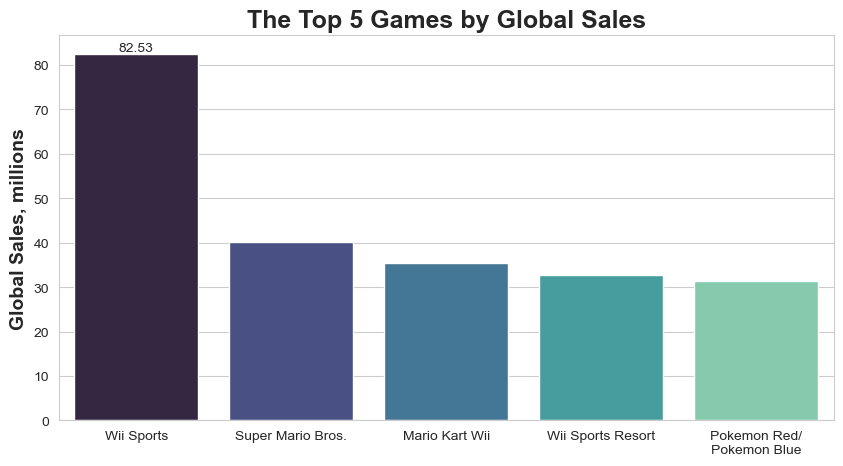

In [38]:
#sns.set(style='darkgrid')
sns.set_style("whitegrid") 

plt.figure(figsize=(10, 5))
plt.title('The Top 5 Games by Global Sales', fontdict=title_font)

ax = sns.barplot(
    data=top_5_games,
    x='Name',
    y='Global_Sales',
    palette='mako')

ax.bar_label(ax.containers[0])
adjusted_labels = [text.get_text().replace("/", "/\n") if "Pokemon" in text.get_text() 
                   else text.get_text() for text in ax.get_xticklabels()]
ax.set_xticklabels(adjusted_labels)
#ax.grid(visible=True)

plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Global Sales, millions', fontsize=14, fontweight='bold')

plt.show()

For visual attractiveness, I chose a perceptually uniform colour palette known as 'mako' against a white background. This choice is deliberate for the accurate representation of numerical values, as the wide luminance range of the palette makes it easy to distinguish between two colours. ([Waskom, 2024a](#(Waskom-2024a))) I only added a y-axis lines to the grid, as the x-axis has categorical values and it would not be useful.

The main title and the y-axis title are bold and relatively large for easy reading. I have omitted the title of the x-axis, as it only contains the names of the games, which made the plot look tidier. I also added the adapted name _Pokemon Red/Pokemon Blue_, as it was on top of the companion heading.

In this Top 5 Games by Global Sales, __Wii Sports__ stands out as an outlier. Having researched this, the game was bundled with the Wii console  in all regions, except Japan, and is widely considered a key factor in the console's success ([Kohler, 2008](#Kohler)). This contributed to the Wii becoming Nintendo's second-best-selling home console by 2022 ([Ashcraft, 2022](#Ashcraft)).

### 1.2 Is there a correlation between the "na_sales" and "jp_sales" for the years 2010-2014?


As a main illustration of this question, I have chosen a bar chart with each total sales amount and a correlation line over it to show the coefficient dynamics. I have carefully chosen colours using a colour wheel so that the data is contrasted and easy to read.

Additionally, I created a scatterplot using a basic blue color to examine correlation.

In [39]:
df_10_14 = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)&(df['Year_of_Release'] != 0)]
na_jp_sales = df_10_14[['NA_Sales', 'JP_Sales']]

na_jp_sales_correlation_value = na_jp_sales.corr().iloc[0, 1]
na_jp_sales_correlation_value

0.26047762956424325

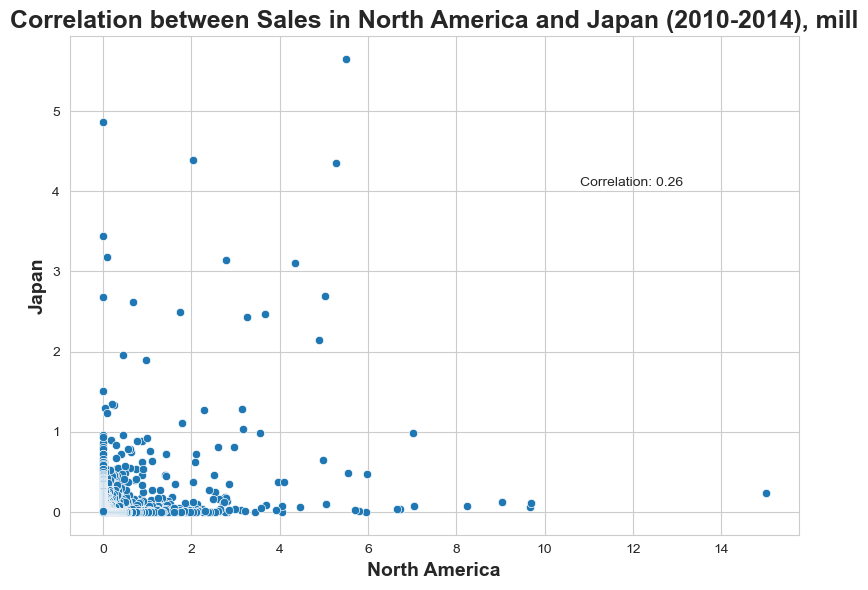

In [40]:
plt.figure(figsize=(8, 6))
plt.title('Correlation between Sales in North America and Japan (2010-2014), mill', fontdict=title_font)

sns.scatterplot(data=na_jp_sales, x='NA_Sales', y='JP_Sales')

plt.xlabel('North America', fontsize=14, fontweight='bold')
plt.ylabel('Japan', fontsize=14, fontweight='bold')

plt.annotate(f"Correlation: {na_jp_sales_correlation_value:.2f}", xy=(0.7, 0.7), xycoords='axes fraction')

plt.tight_layout()
plt.show()


The calculated coefficient is 0.26, suggesting that the correlation between sales in North America and Japan is very weak, as noted by [Calkins (2005)](#Calkins). There is no sign of a linear relationship in the scatterplot either.

But let's look at the correlation coefficient for each year.

In [41]:
df_filtered = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

df_sales_corr = df_filtered[['Year_of_Release', 'NA_Sales', 'JP_Sales']]


yearly_correlation = df_sales_corr.groupby('Year_of_Release').apply(lambda x: x['NA_Sales'].corr(x['JP_Sales'])).reset_index(name='Correlation')
correlation_mapping = dict(zip(yearly_correlation['Year_of_Release'], yearly_correlation['Correlation']))
df_sales_corr['Correlation'] = df_sales_corr['Year_of_Release'].map(correlation_mapping)
df_sales_corr

,Year_of_Release,NA_Sales,JP_Sales,Correlation
14,2010,15.00,0.24,0.215427
16,2013,7.02,0.98,0.259919
23,2013,9.66,0.06,0.259919
27,2010,5.51,5.65,0.215427
29,2011,9.04,0.13,0.312472
...,...,...,...,...
16692,2011,0.01,0.00,0.312472
16696,2014,0.00,0.00,0.325626
16700,2011,0.01,0.00,0.312472
16706,2011,0.00,0.00,0.312472


In [42]:
yearly_correlations = df_sales_corr.groupby('Year_of_Release')['Correlation'].max()
years = yearly_correlations.index.to_numpy()

na_sales_sum = df_filtered.groupby('Year_of_Release')['NA_Sales'].sum().to_numpy()
jp_sales_sum = df_filtered.groupby('Year_of_Release')['JP_Sales'].sum().to_numpy()

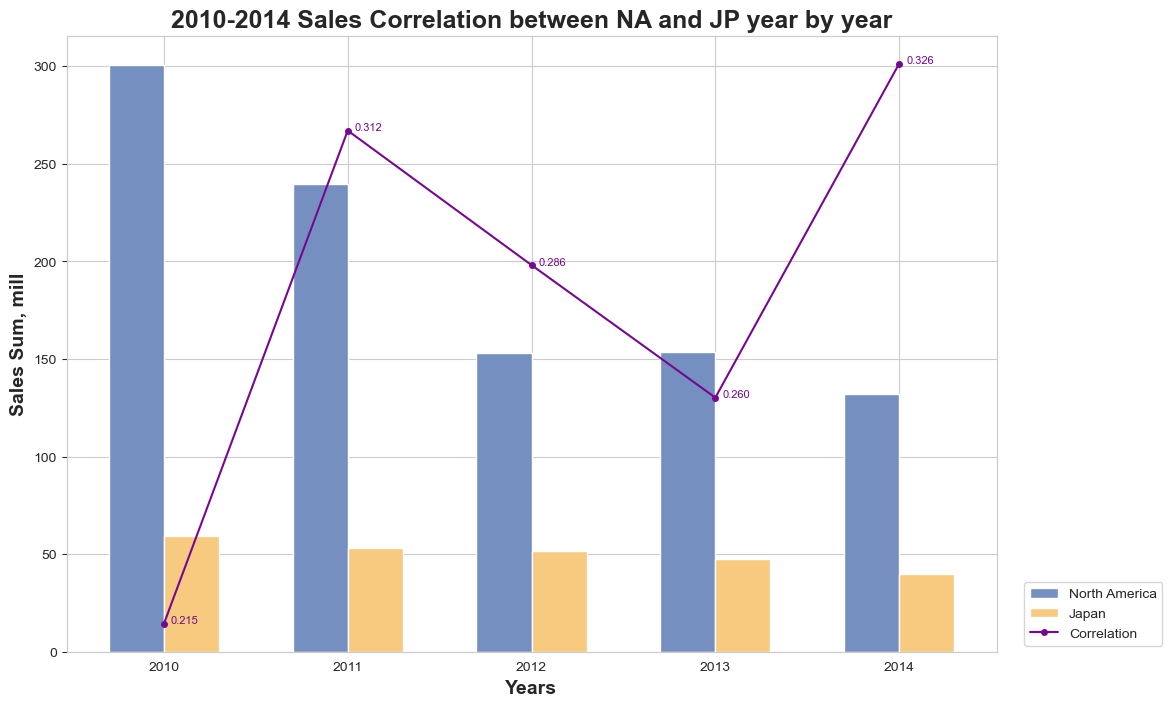

In [43]:
sns.set_style("whitegrid")  # white grid

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.title('2010-2014 Sales Correlation between NA and JP year by year', fontdict=title_font)

# 2-Bar plot for sales with Y-axis labels
ax1.bar(years - 0.15, na_sales_sum, width=0.3,
        label='North America', color='#7590c0')
ax1.bar(years + 0.15, jp_sales_sum, width=0.3, 
        label='Japan', color='#F7CA80')

# Set Y-axis label for sales
ax1.set_ylabel('Sales Sum, mill', fontsize=14, fontweight='bold')
ax1.set_xlabel('Years', fontsize=14, fontweight='bold')


# Correlation line
ax2 = ax1.twinx()
ax2.grid(visible=False) # remove secondary axis grid

corr_color = '#760890'
correlation_line, = ax2.plot(years, yearly_correlations, 'o-', 
                             markersize=4, markerfacecolor=corr_color, markeredgewidth=1,
                             markeredgecolor=corr_color, color=corr_color, label='Correlation')

for i, year in enumerate(years):
    correlation_value = yearly_correlations.iloc[i]
    ax2.annotate(f"{correlation_value:.3f}", (year, correlation_value),  # format value to 3 decimals
                 xytext=(5, 0),  # offset of annotation
                 textcoords="offset points", fontsize=8, color=corr_color)


ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

# Labels and title
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc=[1.03, 0.01])

plt.show()

This chart shows that sales in Japan decline slightly from year to year, but remain at around the same level of 50 million. Meanwhile, sales in North America are halved over the whole period. There are 2 years when the correlation coefficient was above 0.3 – 2011 and 2014, indicating **a low correlation between the regions** [(Calkins, 2005)](#Calkins).

### 1.3 What is the distribution of the most popular 4 game genres?

At the first glance on this question, I was thinking about the most popular genres to be the most released genres.

In [44]:
top_4_genres = df['Genre'].value_counts().head(4)
filtered_genres_data = df[df['Genre'].isin(top_4_genres.index)]

genre_distribution = df['Genre'].value_counts(normalize=True) * 100
genre_distribution = pd.DataFrame(genre_distribution)
genre_distribution.reset_index(inplace=True)

While the standard Seaborn colour palette offers a decent selection, it's limited to 10 colours (blue and orange are repeating, as seen above). In order to ensure a consistent representation of the TOP 4 genres, I'm going to create a custom palette with 12 unique colours and assign a different colour to each genre in all of the analyses in this exploration.

In [45]:
# modify palettte
unique_colors = sns.color_palette(n_colors=len(genre_distribution['Genre']))
unique_colors = unique_colors[:-2]
element = unique_colors.pop(7)  # take gray
unique_colors.insert(2, element)  # insert gray
# add
unique_colors.insert(-3, '#4edc9f') # greeb
unique_colors += ['#ffdc10'] # yellow
unique_colors_ = sns.color_palette(unique_colors)
(unique_colors_)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.3058823529411765, 0.8627450980392157, 0.6235294117647059),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (1.0, 0.8627450980392157, 0.06274509803921569)]

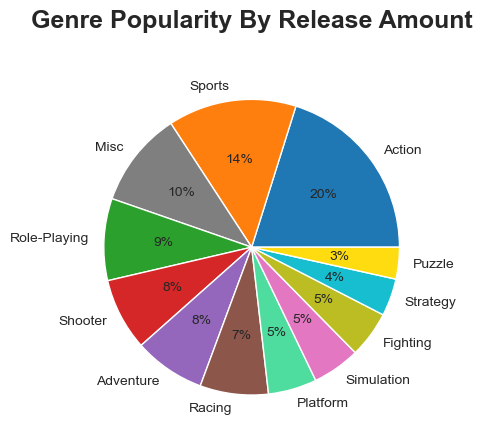

In [46]:
plt.title("Genre Popularity By Release Amount\n", fontdict=title_font)

patches, texts, autotexts = plt.pie(genre_distribution['proportion'], labels=genre_distribution['Genre'], 
        colors=unique_colors_,
        autopct='%.0f%%')
plt.show()

A pie chart was chosen to effectively visualize the data's proportions. This choice allows for a clear and simple representation of the genre distribution, with each slice of the pie proportionally reflecting the percentage of games released in that genre.

As the pie chart shows, the top four genres are: __Action, Sports, Role-playing__ and __Shooters__ (excluding the 'Miscellaneous' category).

However, the number of releases doesn't necessarily indicate sales dominance. To dive deeper and identify the world's leading genres, I need to analyse yearly sales data. Let's examine the top 4 earners and see how these categories compare over time.

In [47]:
# Retrieve and print the colors
genre_colors = {genre: patch.get_facecolor() for genre, patch in zip(genre_distribution['Genre'], patches)}
print(genre_colors)

{'Action': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1), 'Sports': (1.0, 0.4980392156862745, 0.054901960784313725, 1), 'Misc': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1), 'Role-Playing': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1), 'Shooter': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1), 'Adventure': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1), 'Racing': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1), 'Platform': (0.3058823529411765, 0.8627450980392157, 0.6235294117647059, 1), 'Simulation': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1), 'Fighting': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1), 'Strategy': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1), 'Puzzle': (1.0, 0.8627450980392157, 0.06274509803921569, 1)}


In [48]:
palette_new = [unique_colors_[0], unique_colors_[3], unique_colors_[4], unique_colors_[1]] + unique_colors[5:]
palette_new = sns.color_palette(palette_new)

In [49]:
palette_new

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.3058823529411765, 0.8627450980392157, 0.6235294117647059),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (1.0, 0.8627450980392157, 0.06274509803921569)]

In [50]:
#top 4 genres by global sales
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(4).index.tolist()
top_genres_df = df[(df['Genre'].isin(top_genres)&df['Year_of_Release'] != 0)]

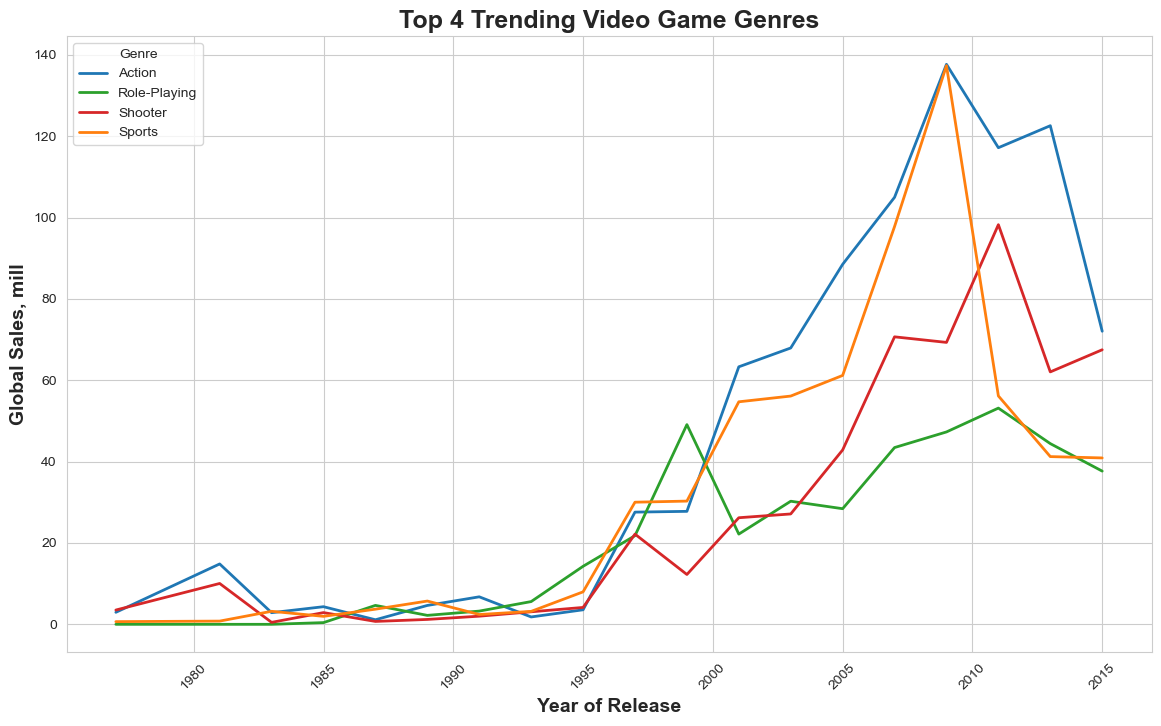

In [51]:
sns.set_palette(palette_new)

genre_year_distribution = top_genres_df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 8))
plt.title('Top 4 Trending Video Game Genres', fontdict=title_font)

sns.lineplot(data=genre_year_distribution,
            dashes=False, linewidth=2)
plt.xlabel('Year of Release', fontsize=14, fontweight='bold')
plt.ylabel('Global Sales, mill', fontsize=14, fontweight='bold')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The genres that are published the most are also the ones that sell the most. It is interesting to note that the graph shows a significant increase in the popularity of the action and sports genres from 1995 onwards, followed by a sharp decline in the sports genre from 2010 onwards.

The line chart provides some information, but is not the most insightful method. Let's try stacked bars and see if it improves readability.

In [52]:
top_genres

['Action', 'Sports', 'Shooter', 'Role-Playing']

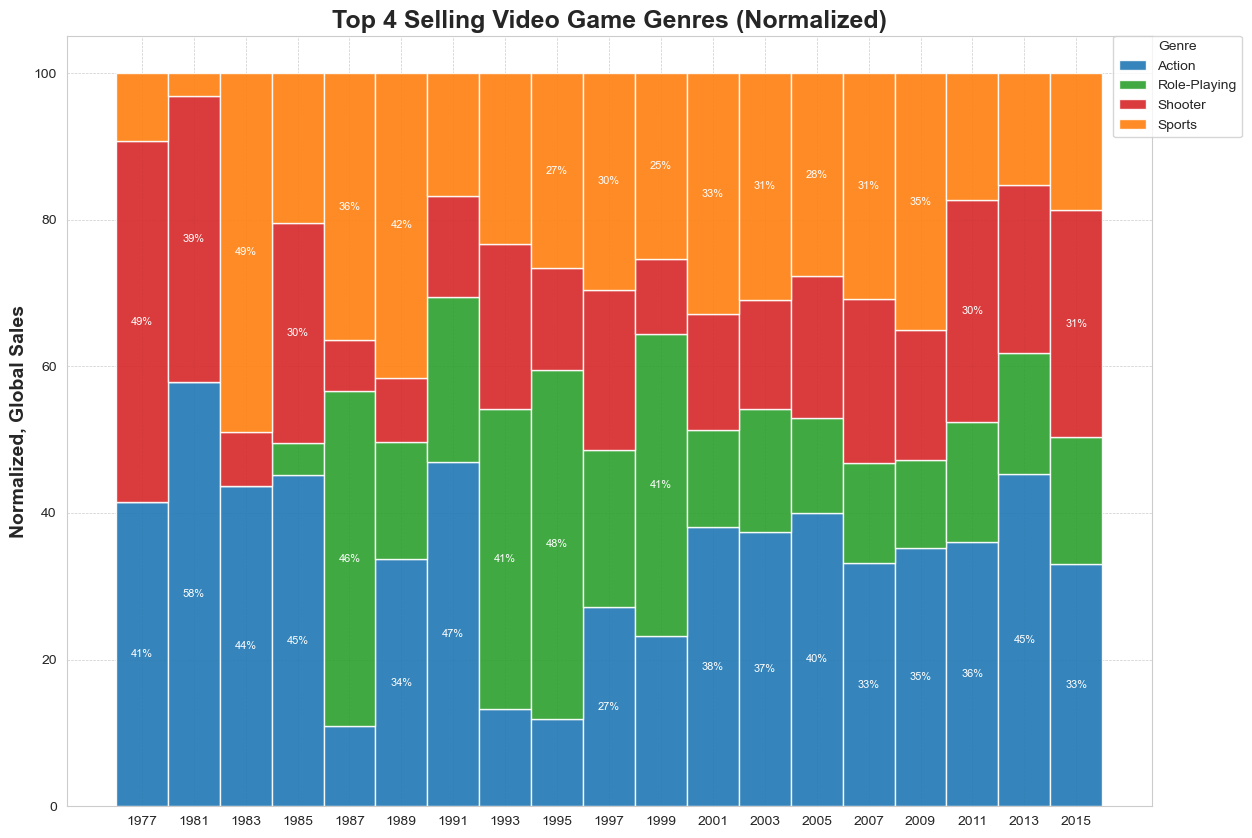

In [53]:
yearly_totals = genre_year_distribution.sum(axis=1)
normalized_genre_distribution = genre_year_distribution.divide(yearly_totals, axis=0) * 100

sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
plt.title('Top 4 Selling Video Game Genres (Normalized)', fontdict=title_font)

# Convert the index to string to ensure it's treated as categorical data by matplotlib
years = normalized_genre_distribution.index.astype(str)
genres = normalized_genre_distribution.columns

# We'll stack the bars manually by keeping track of the bottom position for each bar
bottom_position = np.zeros(len(years))

for genre in genres:
    normalized_sales = normalized_genre_distribution[genre]
    bars = plt.bar(years, normalized_sales, bottom=bottom_position, label=genre, alpha=0.9, width=1)
    bottom_position += normalized_sales

    #print(normalized_sales)
    for bar, label in zip(bars, normalized_sales):
        height = bar.get_height()
        if height > 25: 
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{label:.0f}%', 
                     ha='center', va='center', fontsize=8, c='white')

# plt.xlabel('Year of Release', fontsize=14, fontweight='bold')
plt.ylabel('Normalized, Global Sales', fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.09, 1.01),
           loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.tight_layout()
plt.show()


This stacked bar chart provides a general overview, but it does have some constraints. Firstly, I've only calculated the top 4 genres over the entire dataset, so the chart doesn't show the leading genres from year to year. This is why we see the introduction of the _Role-Playing_ genre in 1985. Secondly, tracking sales trends for genres positioned in the middle of the stack can be challenging due to their shifting bar positions from year to year.

To overcome these limitations and present a more comprehensive overview of the annual market landscape, I experimented with various visualization methods, including histograms, line charts, and dot plots. However, I felt these methods were unable to effectively demonstrate the dynamic nature of the top 4 genres across different years.

As a result, I propose a heatmap-inspired visualization. It presents years in chronological order on the left axis, followed by four columns representing the top four positions (1st, 2nd, 3rd, and 4th). It is important to note that the visualization does not display actual sales figures, but rather focuses on highlighting the genre that holds each top position in a given year.

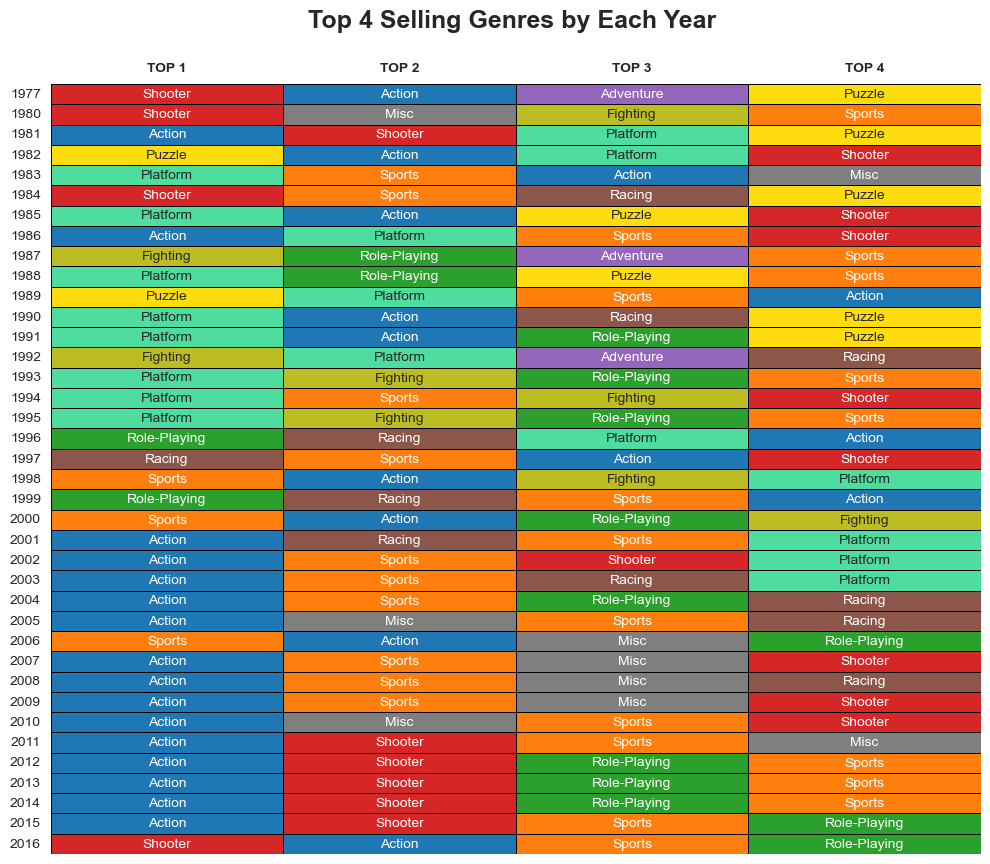

In [54]:
year_genre_sales = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()

top_genres_by_year = year_genre_sales.groupby('Year_of_Release').apply(
    lambda x: x.nlargest(4, 'Global_Sales')
).reset_index(drop=True)

top_genres_by_year['rank'] = top_genres_by_year.groupby('Year_of_Release')['Global_Sales'].rank("dense", ascending=False)


pivot_df_corrected = top_genres_by_year.pivot(index='Year_of_Release', columns='rank', values='Genre')
pivot_df_corrected.columns = [f'TOP {i}' for i in range(1, 5)]

pivot_df_corrected.reset_index(inplace=True)

num_genres = len(genre_colors)
genre_to_num = {genre: i for i, genre in enumerate(genre_colors.keys(), start=1)}

pivot_df_corrected.set_index('Year_of_Release', inplace=True)
pivot_df_mapped = pivot_df_corrected.applymap(genre_to_num.get)

# Creating a custom colormap based on genre_colors
from matplotlib.colors import ListedColormap
cmap = ListedColormap(genre_colors.values())

print()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot_df_mapped, annot=pivot_df_corrected,
            fmt='', cmap=cmap, cbar=False, ax=ax, linewidths=0.6, linecolor='black')

# Customizing tick labels for readability and aesthetics
ax.axes.get_yaxis().set_label_text('')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center',fontdict={'fontweight': 'bold'})
ax.set_title('Top 4 Selling Genres by Each Year \n', fontdict=title_font)
plt.show()

Although the current visualisation shows the data correctly, the layout and colours might make it hard for a person to understand the data easily. I understand that there's room for improvement, but that's the best solutiob I've found based on what I've learned so far.

In order to remain consistent with the main objective, which is to manage a sales strategy for the coming season, the distribution graph will focus exclusively on the top-selling genres identified earlier. This approach follows the trend observed in the sales data since 2011, which suggests a stable domination of these genres in terms of overall sales.  Kernel Density Estimation (KDE) are excellent for displaying overlapping data and provide a better picture of how sales are distributed within each genre, so I'll be using them for this analysis.

In [55]:
sales_by_year_genre = top_genres_df.pivot_table(index='Year_of_Release', columns='Genre', values='Global_Sales', aggfunc='sum').fillna(0)
sales_by_year_genre_melted = sales_by_year_genre.reset_index().melt(id_vars=['Year_of_Release'],var_name='Genre', value_name='Global Sales')

<Figure size 1400x700 with 0 Axes>

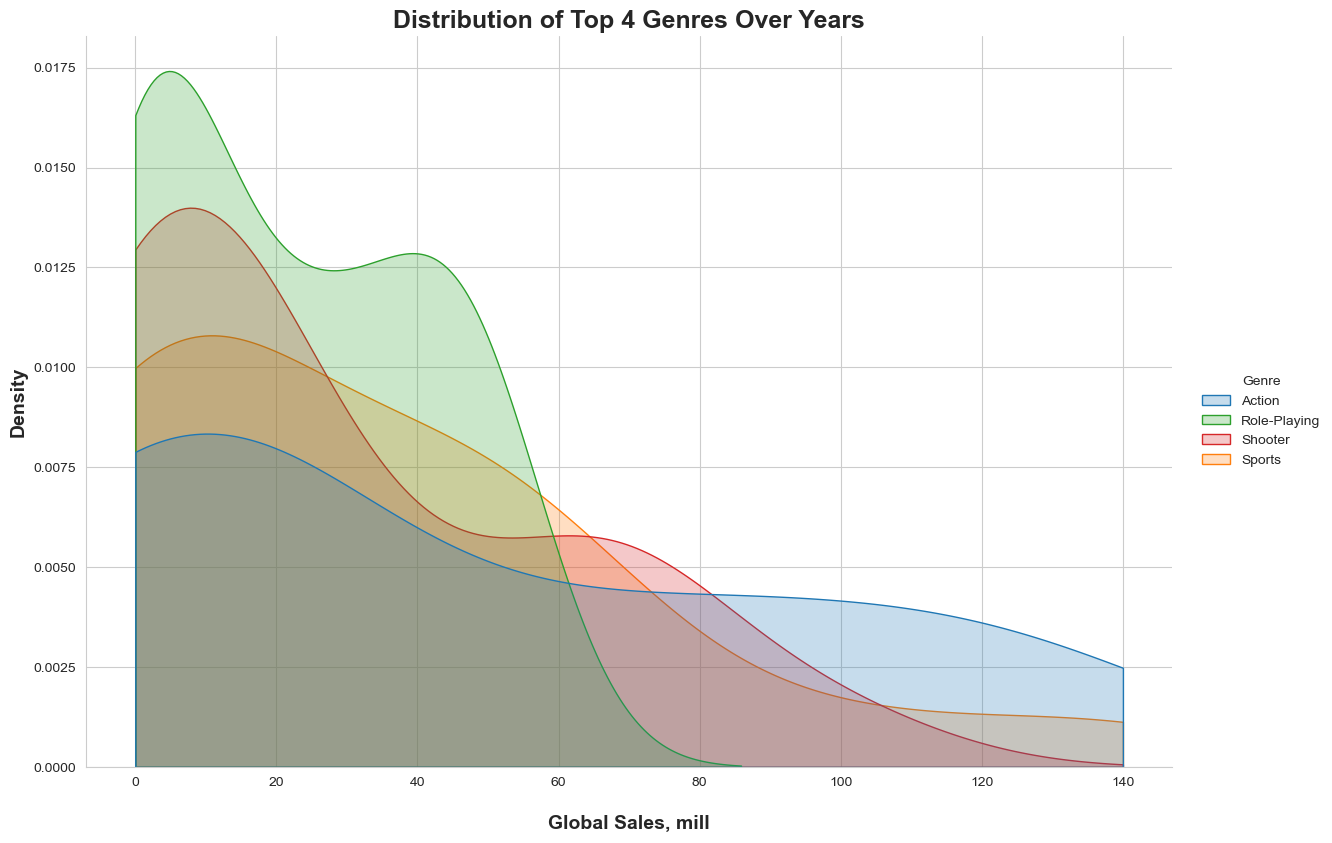

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.displot(data=sales_by_year_genre_melted,
            #x='Year_of_Release',
            x='Global Sales',
            # y='Global Sales',
            hue='Genre', 
            # kde=True,
            kind='kde', clip=(0, round(sales_by_year_genre_melted['Global Sales'].max())+2),
            fill=True, height=8, aspect=1.5, 
            common_norm=False,
           )
plt.title('Distribution of Top 4 Genres Over Years', fontdict=title_font)
# plt.xlabel('\nYear of Release', fontsize=14)
plt.xlabel('\nGlobal Sales, mill', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

plt.show()

Unlike stacked bars or histograms, KDE charts can effectively handle multiple categories simultaneously. This chart uses KDE to create a smooth curve for each genre, with the peak representing the sales range most commonly associated with that genre. In other words, the peak represents the point where the concentration of games within a particular genre is highest in terms of sales. [(Waskom, 2024b)](#Waskom-2024b) To avoid misleading interpretations, I have bounded the x-axis to the range within which the forecast model can make reliable estimates. In this way, the visualisation does not suggest the existence of data outside the range of observations, which would be nonsensical ([Visualizing distributions: Histograms and density plots, 2017](#distributions)).


The peak at zero on the sales axis indicates a high concentration of games with low or no sales, particularly in the *Role-Playing* and *Shooter* genres as their peak is closer to zero. The *Action* and *Sports* genres appear to be the sales leaders, because the curves are more evenly distributed. This suggests a greater number of games across a wider sales range. *Shooter* genre is showing a greater concentration of sales figures around 60-70 million. *Role-playing*, on the other hand, seems to have some blockbusters, with a secondary peak around 35-45 million in sales.

### 1.4 Do older games (2005 and earlier) have a higher MEAN "eu_sales" than newer games (after 2005)?


To validate this assumption, I will create a box plot to present the distribution of EU sales before and after 2005 using 3 columns: Year_of_Release' (converting to 'Period'), 'EU_Sales'.


In [57]:
basic_q4_df = df[['Year_of_Release', 'Name', 'EU_Sales']]
newer_games = basic_q4_df[(basic_q4_df['Year_of_Release'] >=2006)&(basic_q4_df['EU_Sales'].notna())]
older_games = basic_q4_df[(basic_q4_df['Year_of_Release'] <= 2005)&(basic_q4_df['EU_Sales'].notna())]

# Calculating the mean EU sales for both groups
mean_eu_sales_older = older_games['EU_Sales'].mean()
mean_eu_sales_newer = newer_games['EU_Sales'].mean()

In [58]:
mean_eu_sales_older,mean_eu_sales_newer

(0.14589828897338403, 0.14452744928372271)

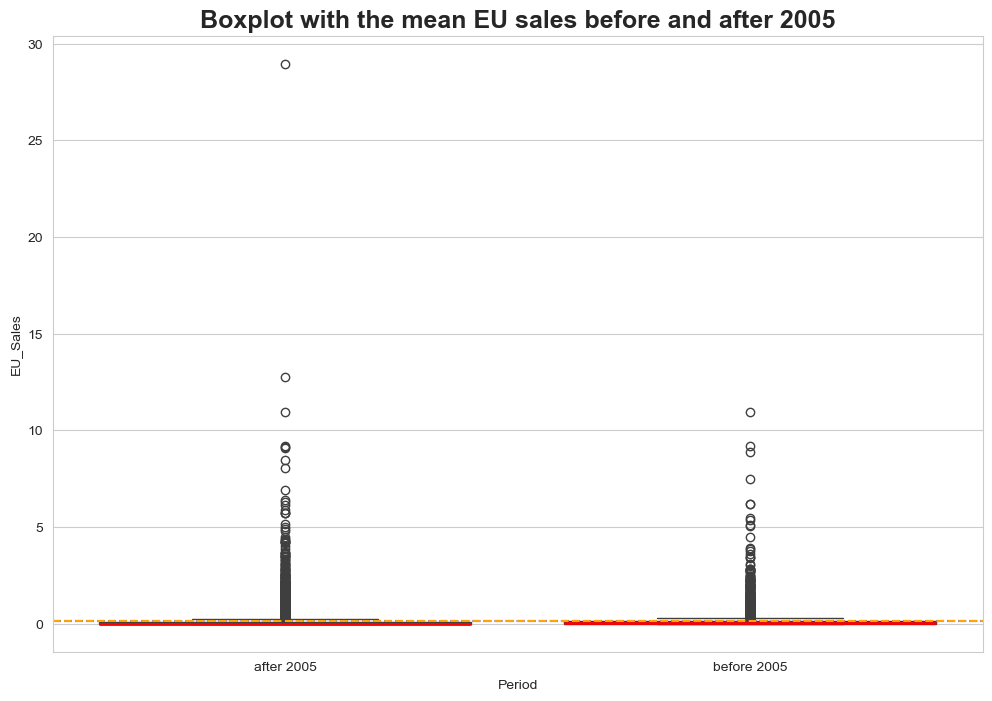

In [59]:
basic_q4_df['Period'] = basic_q4_df['Year_of_Release'].apply(lambda x: 'before 2005' if x <= 2005 else 'after 2005')

basic_q4_df[['Year_of_Release', 'Period']].head()
# basic_q4_df.drop([0,2,10,3], inplace=True)

plt.figure(figsize=(12, 8))
sns.boxplot(data=basic_q4_df, y="EU_Sales", x="Period",
            medianprops={"color": "r", "linewidth": 2},)

plt.axhline(y=mean_eu_sales_older, color="blue", linestyle="--", label="Older Games Mean")
plt.axhline(y=mean_eu_sales_newer, color="orange", linestyle="--", label="Newer Games Mean")
plt.title('Boxplot with the mean EU sales before and after 2005', fontdict=title_font)
plt.show()


This box plot is not working as expected. There are several reasons why it does not present what I wanted properly:
- there are some extreme outliers, some games have very high EU sales, the amount of these few points is skewing the chart.
- differences in video game sales overlap for many games, including the ones with zero sales. It is quite challenging to see how many different games each sales range represents.

That's why now I will create a line chart showing the mean sales trend for European video games across release years. The x-axis will represent the release year and the y-axis – the average sales.

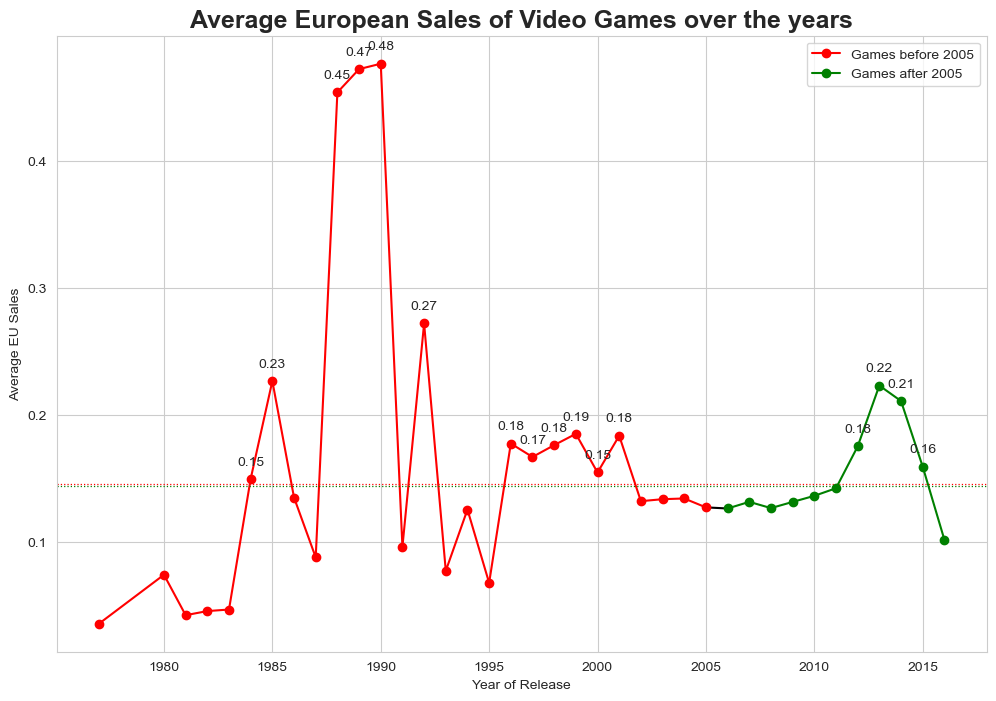

In [60]:
line1 = older_games.groupby('Year_of_Release').mean('EU_Sales')
line2 = newer_games.groupby('Year_of_Release').mean('EU_Sales')


mean_sales_per_year = basic_q4_df.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()
mean_sales_per_year

plt.figure(figsize=(12, 8))
plt.plot([line1.index[-1], line2.index[0]],
         [line1['EU_Sales'][line1.index[-1]], line2['EU_Sales'][line2.index[0]]], '-', color='black')

line_1 = plt.plot(line1.index, line1['EU_Sales'], 'r-o', label='Games before 2005')  # Red for older games
for year, sales in line1.itertuples():
    if sales > mean_eu_sales_older:
        plt.annotate(f'{sales:.2f}', (year, sales), textcoords="offset points", xytext=(0,10), ha='center')

plt.axhline(y=mean_eu_sales_older, color='red', linestyle='dotted', linewidth=0.9)

        
line_2 = plt.plot(line2.index, line2['EU_Sales'], 'g-o', label='Games after 2005')  # Green for newer games
for year, sales in line2.itertuples():
    if sales > mean_eu_sales_newer:
        plt.annotate(f'{sales:.2f}', (year, sales), textcoords="offset points", xytext=(0,10), ha='center')

plt.axhline(y=mean_eu_sales_newer, color='green', linestyle='dotted', linewidth=0.9)


plt.title('Average European Sales of Video Games over the years', fontdict=title_font)
plt.xlabel('Year of Release')
plt.ylabel('Average EU Sales')
plt.grid(True)
plt.legend()
plt.show()


This line chart shows how average sales changed over the years. I have used two different colours, red and green, to differentiate between the categories. I have also added annotations in the years where a year average is higher than the overall mean. For a better analysis of the averages, I have introduced two horizontal lines that represents the mean "EU sales" for both categories.

However, the graph does not show a trend, neither an increase nor a decrease.  As the difference between the averages is not significant, this may not be the most elegant way of highlighting, but it is certainly sufficient.


### 1.5 What are the 3 most common "developer" in the dataset?


For this question, I've again chosen a bar chart, primarily because my goal is to display quantitative values ([Visualising amounts, 2017](#Wilke-6)). This time, however, I've inverted the axis and introduced another custom color palette.

In [61]:
developer_counts = df['Developers'].explode().value_counts().reset_index()
developer_counts.columns = ['Developer', 'Count']
developer_counts.sort_values('Count', ascending=False)
developer_counts.sample(5)

,Developer,Count
1464,Hot Lava Games,1
1092,Arrowhead Game Studios,1
508,Targem Games,4
629,Activision Value,3
311,Luxoflux Inc.,8


In [62]:
top_6_dev = developer_counts.head(6)

In [63]:
custom_palette = ['#c95c4f', '#83a121', '#6b8ad5', 
                  '#999999', '#b3b3b3', '#cccccc']
c = sns.color_palette(custom_palette, as_cmap=True)

<Figure size 1000x1000 with 0 Axes>

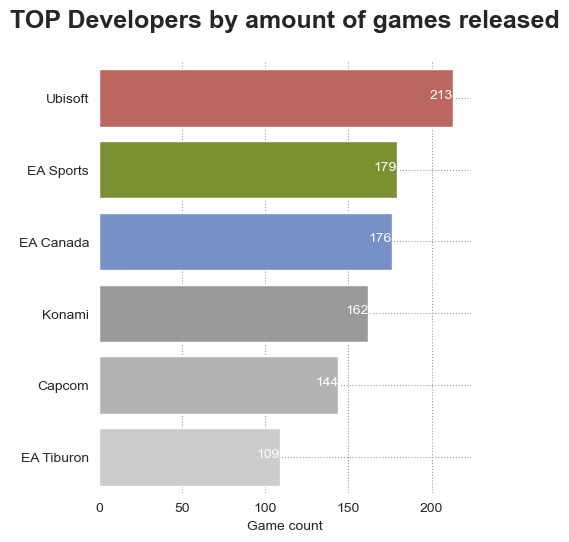

In [64]:
plt.figure(figsize=(10, 10))

sns.set_style("darkgrid", {
    "axes.facecolor": "1.",
    "grid.color": ".6", "grid.linestyle": ":"})


g = sns.catplot(data=top_6_dev, x='Count', y='Developer',
            kind="bar", palette=c)

g.ax.set_title('TOP Developers by amount of games released\n', fontdict=title_font)
g.ax.set_xlabel('Game count')
g.ax.set_ylabel('')
g.ax.grid(True, which='both')
for index, row in top_6_dev.iterrows():
    g.ax.text(row['Count'], index, row['Count'], color='white', ha="right")


This vertical bar chart illustrates the top six video game developers based on the number of games they have released. I adopted the "Grays with accents" colour scheme from the [Color scales (2017)](#Color) chapter in the Fundamentals of Data Visualization book. This style provides a simple way to highlight top 3 elements by colouring them in bright colours,leaving everuthing else in the shades of gray.

Ubisoft is a leading developer with the most published games, with a significant gap between the second-place developer, EA Sports. However, I suspect that this results are incomplete, because if, for example, all of Electronic Arts' divisions were combined, the overall picture will dramatically change.

I want to examine another hypothesis: the number of games released alone doesn't necessarily indicate commercial success.  Therefore, I will next calculate sales data per game.  This will allow me to use a combination of quantity and sales to determine which developers are producing the most successful games.

In [65]:
df_exploded = df.explode('Developers') # add rows w game for each dev

# WITHOUT YEAR
df_aggregated_new = df_exploded.groupby(['Developers', 'Year_of_Release']).agg(
    Global_Sales=('Global_Sales', 'sum'),
    Count=('Global_Sales', 'count') 
).reset_index()


df_with_top = df_aggregated_new.groupby('Developers').agg(
    Global_Sales=('Global_Sales', 'sum'),
    Count=('Count', 'sum')
).reset_index()

In [66]:
# unite EA
ea_rows = df_aggregated_new[df_aggregated_new['Developers'].str.startswith('EA', na=False) | (df_aggregated_new['Developers'] == 'Electronic Arts')]
new_ea_row = pd.DataFrame({'Developers': "EA United",
                           'Count': [ea_rows['Count'].sum()],
                           'Global_Sales': [ea_rows['Global_Sales'].sum()]})

df_with_top = pd.concat([df_with_top, new_ea_row], ignore_index=True)
df_with_top = df_with_top[~df_with_top['Developers'].isin(ea_rows['Developers']) | (df_with_top['Developers'] == 'EA United')]

#unite rest
top_devs_rest = ['Ubisoft', 'Konami', 'Capcom', 'Visual Concepts', 'Nintendo', 'Rockstar']


for dev in top_devs_rest:
    dev_rows = df_aggregated_new[df_aggregated_new['Developers'].str.contains(dev, na=False)]
    new_row = {
        'Developers': f"{dev} United",
        'Count': dev_rows['Count'].sum(),
        'Global_Sales': dev_rows['Global_Sales'].sum(),
    }
    df_with_top = df_with_top._append(new_row, ignore_index=True)
    df_with_top = df_with_top[~df_with_top['Developers'].str.contains(dev, na=False) \
                              | df_with_top['Developers'].str.contains(f"{dev} United")]

df_with_top.sort_values('Global_Sales', ascending=False, inplace=True)

df_with_top['sale_per_game'] = df_with_top['Global_Sales'] / df_with_top['Count']
df_with_top.sort_values('sale_per_game', ascending=False, inplace=True)
df_with_top

,Developers,Global_Sales,Count,sale_per_game
526,Good Science Studio,21.81,1,21.810000
416,Entertainment Analysis & Development Division,12.66,1,12.660000
970,Polyphony Digital,65.20,7,9.314286
1145,Sledgehammer Games,43.93,7,6.275714
1454,Nintendo United,554.64,91,6.094945
...,...,...,...,...
931,Papyrus,0.01,1,0.010000
935,Paragon 5,0.01,1,0.010000
31,777 Studios,0.01,1,0.010000
692,King of the Jungle,0.02,2,0.010000


To calculate 'sales per game', I divided global sales by the number of games released. I recognise that this approach has limitations. For example, a single game released on multiple platforms would be counted multiple times. Also, some _Developer_ entries may include their parent company (e.g. "EA Sports, Electronic Arts").  Nevertheless, this calculation provides a basic estimate to guide the initial theory. It is always possible to improve our analysis and develop the theory with these constraints in mind.


To produce the chart, I only took developers that had at least 1 million sales per title and reached 100 million sales in total.

In [67]:
new_topdev_df = df_with_top[(df_with_top['sale_per_game']>1.)
                           &(df_with_top['Global_Sales']>100.)] \
                .sort_values('Global_Sales', ascending=False)

new_topdev_df

,Developers,Global_Sales,Count,sale_per_game
1454,Nintendo United,554.64,91,6.094945
1455,Rockstar United,189.65,63,3.010317
623,Infinity Ward,107.45,21,5.116667
1308,Treyarch,104.78,50,2.095600


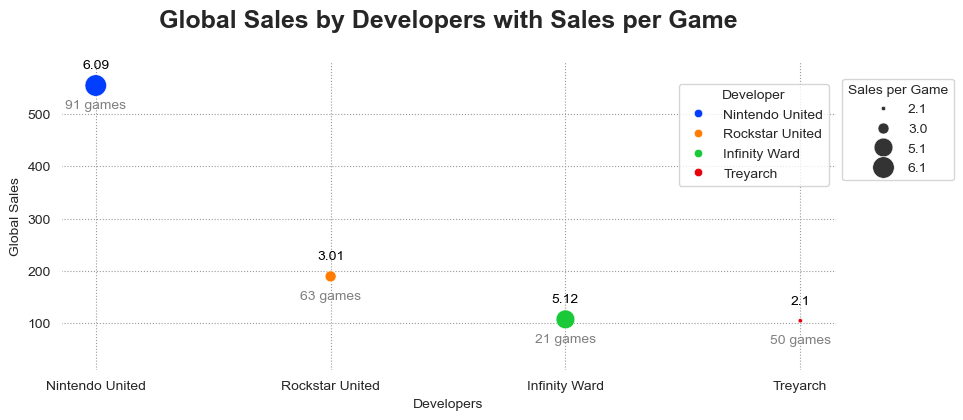

In [68]:
plt.figure(figsize=(10, 4))
scatter = sns.scatterplot(x="Developers",
                          y="Global_Sales",
                          size="sale_per_game",
                          sizes=(10, 240),  # Adjust size range as needed
                          hue="Developers",
                          data=new_topdev_df,
                          palette=sns.color_palette("bright"))

for index, row in new_topdev_df.iterrows():
    scatter.text(row['Developers'], row['Global_Sales'], 
                 f"{round(float(row['sale_per_game']), 2)}\n", 
                 color='black', 
                 ha="center", 
                 va="bottom")
    scatter.text(row['Developers'], row['Global_Sales'], 
                 f"\n{row['Count']} games\n", 
                 color='gray', 
                 ha="center", 
                 va="top")
    

handles, labels = plt.gca().get_legend_handles_labels()

# separate 'Developers' from 'sale_per_game'
dev_handles, dev_labels = [], []
size_handles, size_labels = [], []
collecting_sizes = False
for handle, label in zip(handles, labels):
    if label == 'sale_per_game':  
        collecting_sizes = True
    elif collecting_sizes:
        size_handles.append(handle)
        size_labels.append(round(float(label), 1))
    elif label != 'Developers':    
        dev_handles.append(handle)
        dev_labels.append(label)


dev_legend = plt.legend(dev_handles, dev_labels,
                        title="Developer", loc='lower right', bbox_to_anchor=(1.0, 0.577))
plt.gca().add_artist(dev_legend) 
size_legend = plt.legend(size_handles, size_labels,
                         title="Sales per Game", loc='upper left', bbox_to_anchor=(1., .97))

#plt.xlabel("Developer")
plt.ylabel("Global Sales")
plt.ylim(10, 599)
plt.title("Global Sales by Developers with Sales per Game\n", fontdict=title_font)
plt.show()

In this scatterplot, I have compared developers based on their global sales and average sales per game. Each developer is represented by a circle, with the size of the circle corresponding to the developer's average revenue per game. Larger circles indicate higher average revenue per game. The circles are coloured differently to represent different developers. I have also included annotations with the sales per game and the number of games released to make interpretation easier.

From the plot, it's evident that _Nintendo_ is the most successful developer in terms of revenue. Interestingly, _Infinity Ward_ is third in terms of total sales, but second in terms of sales per game, right behind Nintendo. In contrast, the smaller circle representing _Treyarch_ suggests that they produce less successful games, although they still achieve total sales of over 1000 million.

## Part 2

Bearing in mind that the aim of this analysis is to define the sales strategy for the winter season, and all the knowledge I've already gained from the previous questions, I'd like to study the situation in terms of game platforms.

In [69]:
df_platforms = df[df['Year_of_Release']>=2014].groupby(['Platform']).agg(
    Global_Sales=('Global_Sales', 'sum'),)
df_platforms = df_platforms[df_platforms['Global_Sales'] > 1]
df_platforms.reset_index(inplace=True) 
df_platforms.sort_values('Global_Sales', ascending=False, inplace=True)


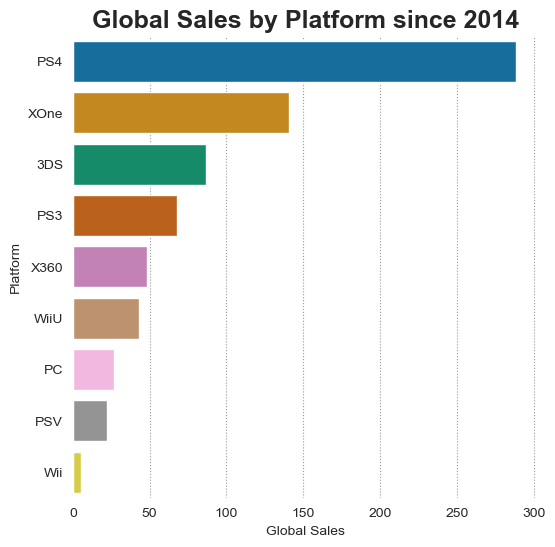

In [70]:
plt.figure(figsize=(6,6))
bar = sns.barplot(df_platforms, x='Global_Sales', y='Platform', palette='colorblind')
plt.title('Global Sales by Platform since 2014', fontdict=title_font)
plt.xlabel("Global Sales")
plt.show()

I've chosen a bar chart again because it's the most effective way of presenting categorical data with magnitudes. The top six developers listed on the x-axis, while the y-axis shows quantitative data - total global sales in millions.

The graph indicated that PS4 has the highest total sales over 2014-2016, followed by Xbox One and Nintendo 3DS.

Now I'll check the top developers in the 4 popular genres I found earlier. This will help me pick specific games to recommend to stores.

In [71]:
data_2010_onwards = df[df['Year_of_Release'] >= 2010]
df_exploded = data_2010_onwards.explode('Developers') # add rows w game for each dev
df_with_top = df_exploded.groupby(['Developers','Genre']).agg(
    Global_Sales=('Global_Sales', 'sum'),
).reset_index()

genre_sales = df_with_top.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

top_developers_list = (df_with_top[df_with_top['Genre'].isin(top_genres)]
                       .groupby(['Genre', 'Developers'])['Global_Sales'].sum()
                       .groupby(level=0, group_keys=False)
                       .nlargest(2).reset_index()['Developers'].unique())

top_developers_df = (df_with_top[(df_with_top['Developers'].isin(top_developers_list)) &
                                 (df_with_top['Genre'].isin(top_genres))]
                     .groupby(['Developers', 'Genre'])['Global_Sales'].sum()
                     .reset_index())


In [72]:
heatmap_data = top_developers_df.pivot(index="Developers", columns="Genre", values="Global_Sales")
heatmap_data.fillna(0, inplace=True)

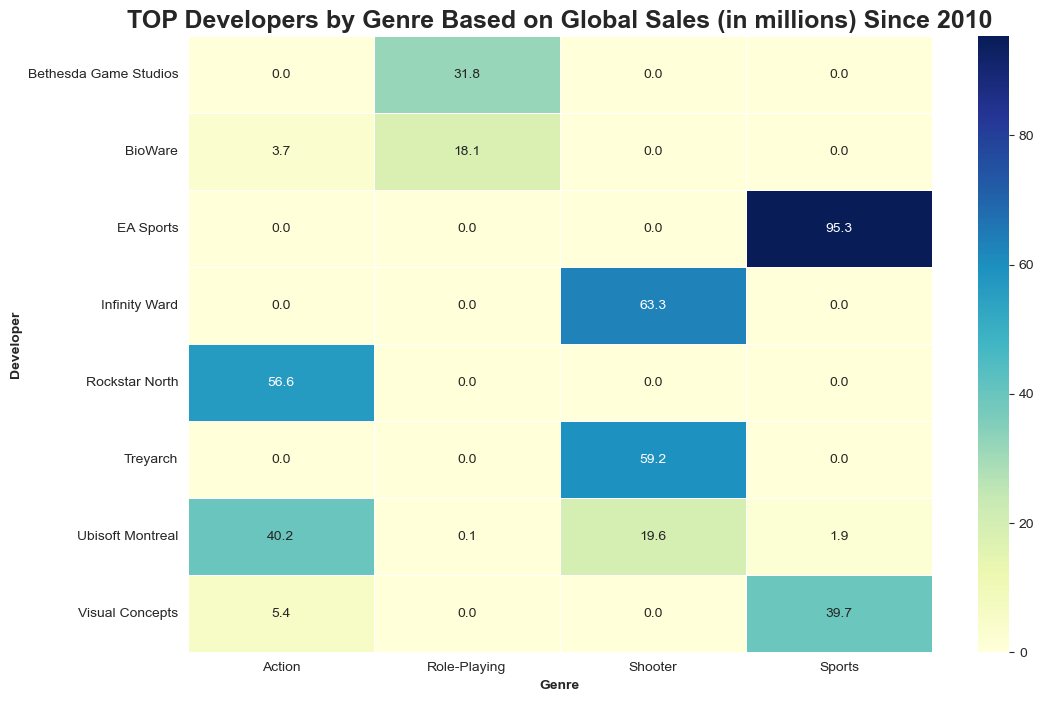

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('TOP Developers by Genre Based on Global Sales (in millions) Since 2010', fontdict=title_font)
plt.ylabel('Developer', fontdict={'fontweight': 'bold'})
plt.xlabel('Genre', fontdict={'fontweight': 'bold'})
plt.show()

There's a clear pattern between developers and the game types they make. And by identifying these leaders, we can recommend the best games to our customers while making a guaranteed profit.

In [74]:
# Sport
games_to_buy =  df[df['Developer'].str.contains('EA Sports', na=False)&
   (df['Platform'].isin(['PS4', 'XOne']))][['Name', 'Genre', 'Platform','Developer', 'Year_of_Release']] \
    .sort_values('Year_of_Release', ascending=False)

games_to_buy = games_to_buy[games_to_buy['Year_of_Release'] == 2016]

In [75]:
#rp
games_to_buy_rp =  df[df['Developer'].str.contains('Bethesda', na=False)&
   (df['Platform'].isin(['PS4', 'XOne']))][['Name', 'Genre', 'Platform','Developer', 'Year_of_Release']] \
    .sort_values('Year_of_Release', ascending=False)


In [76]:
#action
games_to_buy_ac =  df[df['Developer'].str.contains('Rockstar', na=False)&
   (df['Platform'].isin(['PS4', 'XOne']))][['Name', 'Genre', 'Platform','Developer', 'Year_of_Release']] \
    .sort_values('Year_of_Release', ascending=False)

In [77]:
#shoot
games_to_buy_sh =  df[df['Developer'].isin(['Infinity Ward', 'Treyarch'])&
   (df['Platform'].isin(['PS4', 'XOne']))][['Name', 'Genre', 'Platform','Developer', 'Year_of_Release']] \
    .sort_values('Year_of_Release', ascending=False)

In [78]:
games_to_buy = pd.concat([games_to_buy, games_to_buy_ac, games_to_buy_sh, games_to_buy_rp], axis=0)

games_to_buy

,Name,Genre,Platform,Developer,Year_of_Release
1615,Madden NFL 17,Sports,XOne,EA Sports,2016
4668,EA Sports UFC 2,Sports,XOne,EA Sports,2016
571,FIFA 17,Sports,XOne,"EA Sports, EA Vancouver",2016
94,FIFA 17,Sports,PS4,"EA Sports, EA Vancouver",2016
2210,EA Sports UFC 2,Sports,PS4,EA Sports,2016
1007,Madden NFL 17,Sports,PS4,EA Sports,2016
42,Grand Theft Auto V,Action,PS4,Rockstar North,2014
165,Grand Theft Auto V,Action,XOne,Rockstar North,2014
245,Call of Duty: Infinite Warfare,Shooter,PS4,Infinity Ward,2016
640,Call of Duty: Infinite Warfare,Shooter,XOne,Infinity Ward,2016


Considering the fact that no specific region was specified for this analysis, I cannot determine where the company is located. Nonetheless, I believe that studying the regional sales trends could provide valuable insights. 

To do this, I will begin by checking sales in different regions. Then I will make a line plot to identify any trends.

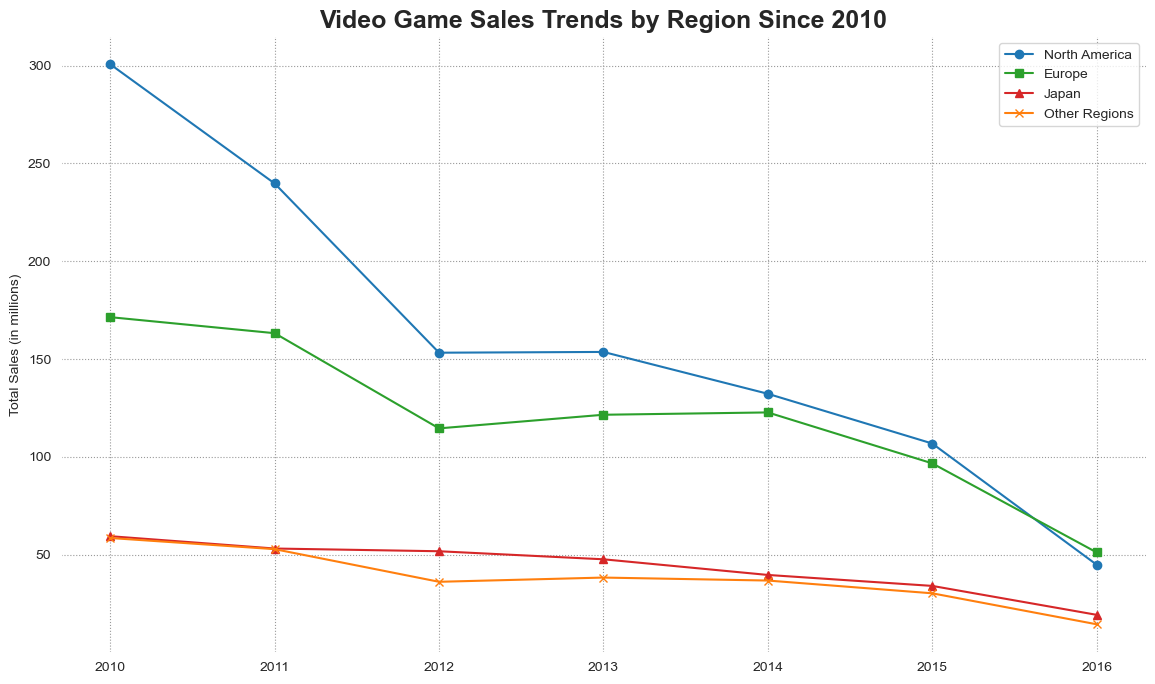

In [79]:
region_sales_by_year = data_2010_onwards.groupby('Year_of_Release').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

plt.figure(figsize=(14, 8))
plt.plot(region_sales_by_year['Year_of_Release'], region_sales_by_year['NA_Sales'], label='North America', marker='o')
plt.plot(region_sales_by_year['Year_of_Release'], region_sales_by_year['EU_Sales'], label='Europe', marker='s')
plt.plot(region_sales_by_year['Year_of_Release'], region_sales_by_year['JP_Sales'], label='Japan', marker='^')
plt.plot(region_sales_by_year['Year_of_Release'], region_sales_by_year['Other_Sales'], label='Other Regions', marker='x')
plt.title('Video Game Sales Trends by Region Since 2010', fontdict=title_font)
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.show()

The graph shows a decline in sales across all regions. One possible cause of this trend is the change in the way games are bought: free-to-play models have become popular, replacing the traditional purchase model where people would buy physical game discs. Of course, I cannot conclude anything from this graph alone, it is just a hypothesis.

### Conclusion

In my analysis of the given data set, I have noted a significant decline in the size of global sales. However, there is no doubt that games in the top four genres tend to be selected. Therefore, this information can serve as a direct instruction for us to focus on prioritising newer platforms such as PS4 and Xbox One. By focusing on these genres and platforms, I believe we can strengthen the company's revenues. I see this shift as strategic to align with the goals and desires of our audience.

In closing, I would like to emphasise to the company's CTO the importance of transforming our stores into dog-friendly spaces, as this would increase our sales ([Daryn, 2023](#Dog)). To support this argument, I prepared my last chart.

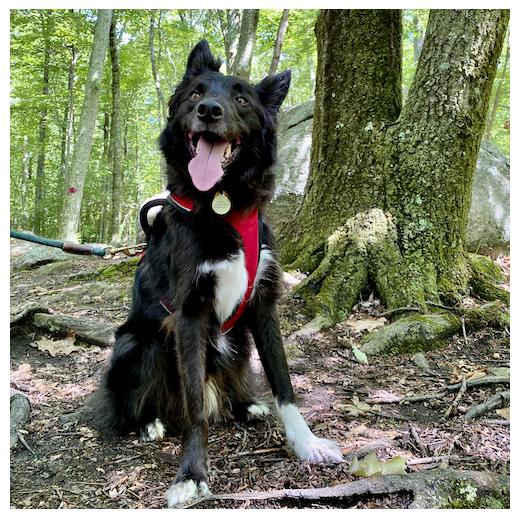

In [80]:
sns.dogplot()

Reference list
==============

<a name="Ashcraft"></a>Ashcraft, B. (2022). *The Nintendo Switch Has Now Surpassed The Wii In Sales*. [online] Kotaku. Available at: https://kotaku.com/nintendo-switch-wii-outsold-worldwide-sales-life-to-dat-1848472923 [Accessed 3 Apr. 2024].


 
<a name="Calkins"></a>Calkins, K.G. (2005). *Correlation Coefficients -- An Introduction to Statistics*. [online] Andrews.edu. Available at: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm [Accessed 23 Mar. 2024].

<a name="Color"></a>Color scales. (2017). In: *Fundamentals of Data Visualization*. [online] Clauswilke.com. Available at: https://clauswilke.com/dataviz/visualizing-amounts.html [Accessed 26 Mar. 2024].

<a name="DreamDancer"></a>Contributors to Nintendo (2023). *Dream Dancer*. [online] Nintendo. Available at: https://nintendo.fandom.com/wiki/Dream_Dancer [Accessed 29 Mar. 2024].

<a name="Dog"></a>Daryn (2023). *The Trend Toward Dog-Friendly Retail Shopping | TimeWellScheduled*. [online] TimeWellScheduled | Managing employees has never been easier. Available at: https://timewellscheduled.com/the-trend-toward-dog-friendly-shopping/ [Accessed 5 Apr. 2024].

<a name="Kohler"></a>Kohler, C. (2008). *2007's Ten Burning Questions, Answered*. [online] WIRED. Available at: https://www.wired.com/2008/01/2007s-ten-burni/ [Accessed 3 Apr. 2024].


<a name="Tsaruk"></a>Tsaruk, J. (2024). *Video Games Verification*. [online] ChatGPT. Available at: https://chat.openai.com/share/b7c726c2-bba7-4cfb-94e3-af25e1b9add9 [Accessed 28 Mar. 2024].

<a name="Wilke-6"></a>Visualizing amounts. (2017). In: *Fundamentals of Data Visualization*. [online] Clauswilke.com. Available at: https://clauswilke.com/dataviz/visualizing-amounts.html [Accessed 26 Mar. 2024].

<a name="distributions"></a>Visualizing distributions: Histograms and density plots. (2017). In: *Fundamentals of Data Visualization*. [online] Clauswilke.com. Available at: https://clauswilke.com/dataviz/histograms-density-plots.html [Accessed 3 Apr. 2024].


<a name="Waskom-2024a"></a>Waskom, M. (2024a). *Choosing color palettes --- seaborn 0.13.2 documentation*. [online] Pydata.org. Available at: https://seaborn.pydata.org/tutorial/color_palettes.html#perceptually-uniform-palettes [Accessed 26 Mar. 2024].

<a name="Waskom-2024b"></a>Waskom, M. (2024b). *Visualizing distributions of data --- seaborn 0.13.2 documentation*. [online] Seaborn. Available at: https://seaborn.pydata.org/tutorial/distributions.html [Accessed 23 Mar. 2024].
